In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# If you're on Windows, you can use raw string (r"") to avoid escape character issues
path = r"..\\results\\prometheus_data\\service-1-deployment_dataset.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(path)

print(df.columns)

# Convert the Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
df = df[df['Timestamp'] > pd.Timestamp('2025-05-11 08:00:00')]



Index(['Timestamp', 'Service', 'CPU Request', 'Memory Request', 'CPU Limit',
       'Memory Limit', 'Latency', 'CPU Usage', 'Memory Usage'],
      dtype='object')


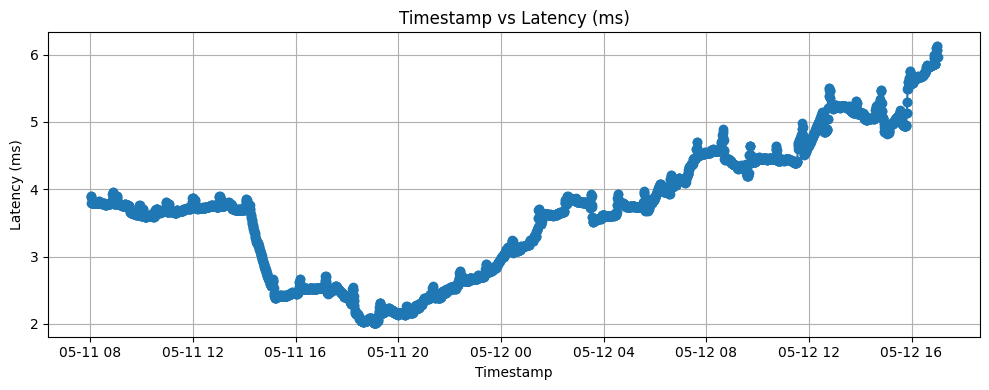

In [2]:
# Plot 1: Timestamp vs Latency (ms)
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Latency'] * 1000, marker='o')
plt.title("Timestamp vs Latency (ms)")
plt.xlabel("Timestamp")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.tight_layout()
plt.show()

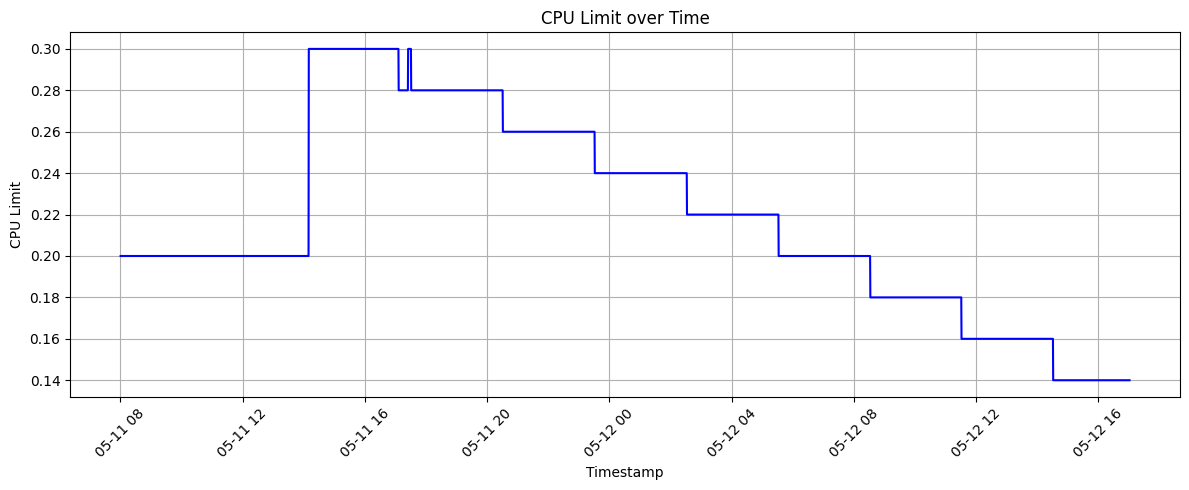

In [3]:
# Plot CPU Limit
plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['CPU Limit'], label='CPU Limit', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('CPU Limit')
plt.title('CPU Limit over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


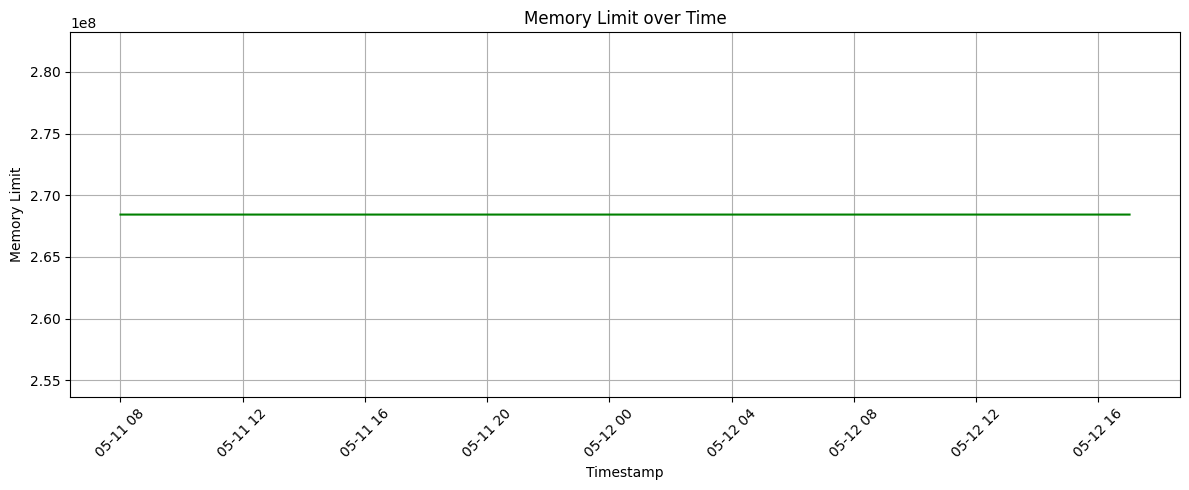

In [4]:
# Plot Memory Limit
plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['Memory Limit'], label='Memory Limit', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Memory Limit')
plt.title('Memory Limit over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

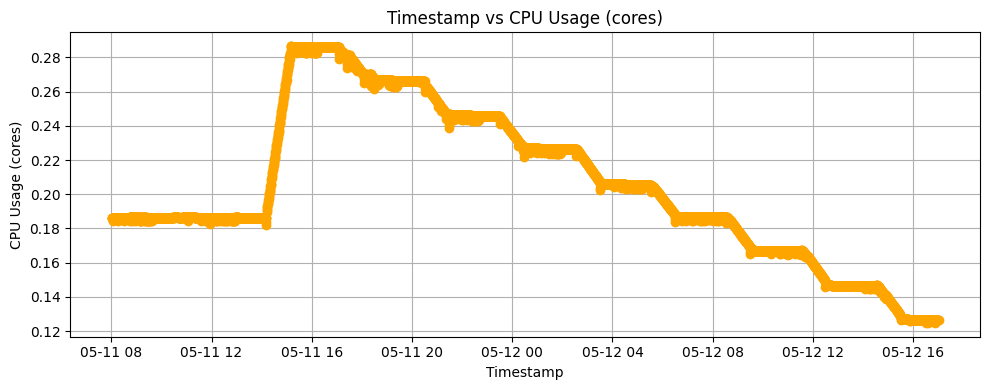

In [5]:
# Plot 2: Timestamp vs CPU Usage
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['CPU Usage'], marker='o', color='orange')
plt.title("Timestamp vs CPU Usage (cores)")
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage (cores)")
plt.grid(True)
plt.tight_layout()
plt.show()

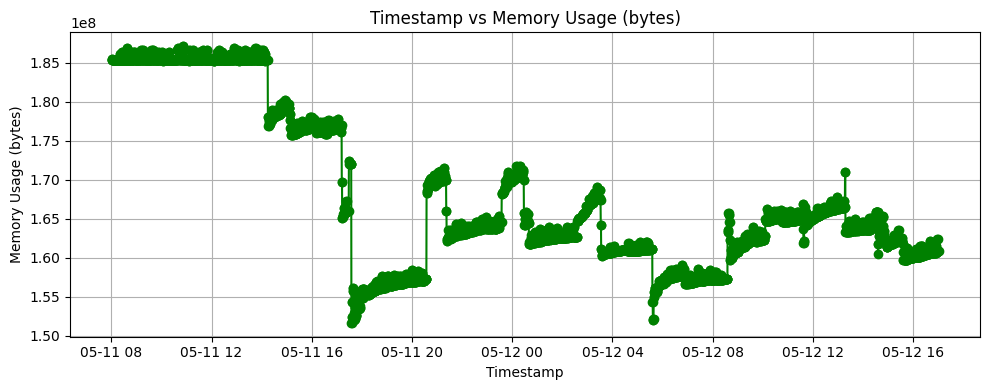

In [6]:
# Plot 3: Timestamp vs Memory Usage
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Memory Usage'], marker='o', color='green')
plt.title("Timestamp vs Memory Usage (bytes)")
plt.xlabel("Timestamp")
plt.ylabel("Memory Usage (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

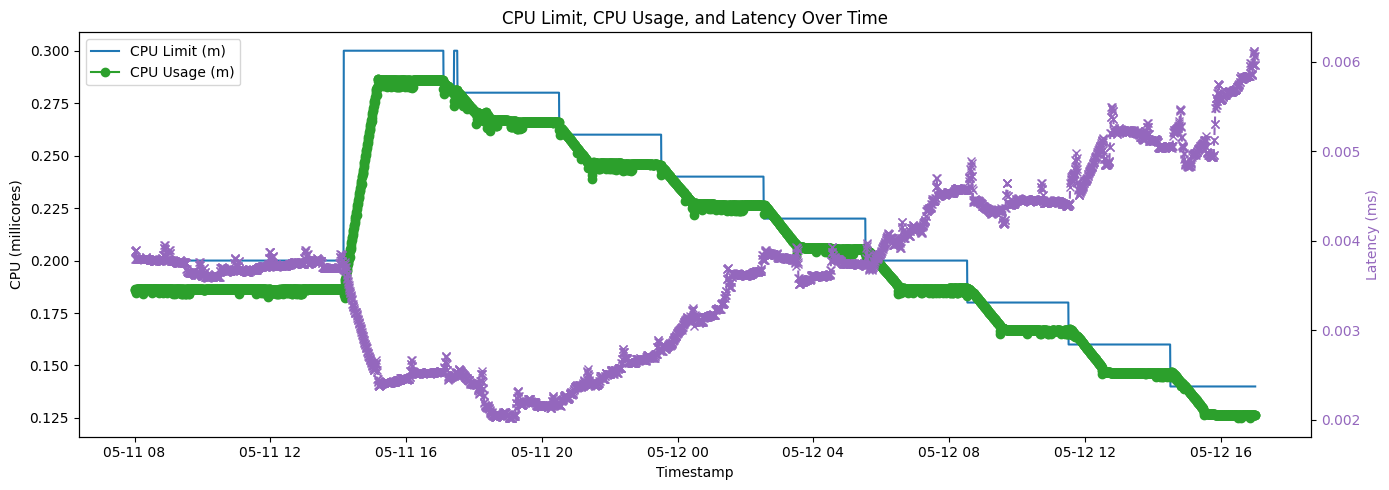

In [7]:
# -------------------- CPU Plot --------------------
fig, ax1 = plt.subplots(figsize=(14, 5))

# Left y-axis: CPU metrics
ax1.plot(df['Timestamp'], df['CPU Limit'], label='CPU Limit (m)', color='tab:blue', linestyle='-')
ax1.plot(df['Timestamp'], df['CPU Usage'], label='CPU Usage (m)', color='tab:green', marker='o')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('CPU (millicores)')
ax1.legend(loc='upper left')
ax1.tick_params(axis='y')

# Right y-axis: Latency
ax2 = ax1.twinx()
ax2.plot(df['Timestamp'], df['Latency'], label='Latency (ms)', color='tab:purple', linestyle='--', marker='x')
ax2.set_ylabel('Latency (ms)', color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple')

plt.title('CPU Limit, CPU Usage, and Latency Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

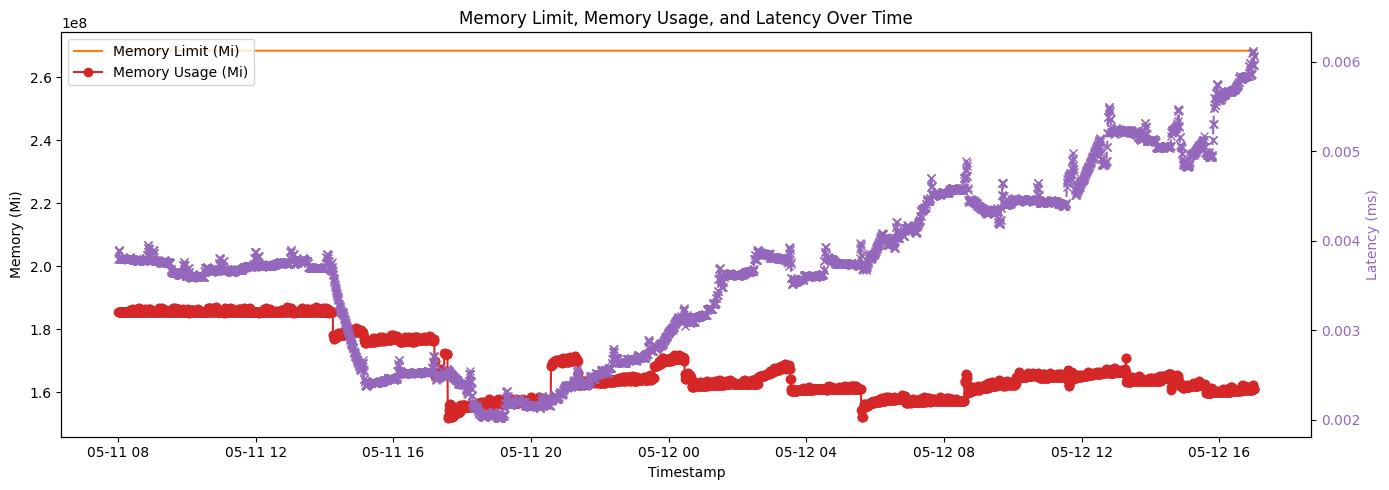

In [8]:
# -------------------- Memory Plot --------------------
fig, ax3 = plt.subplots(figsize=(14, 5))

# Left y-axis: Memory metrics
ax3.plot(df['Timestamp'], df['Memory Limit'], label='Memory Limit (Mi)', color='tab:orange', linestyle='-')
ax3.plot(df['Timestamp'], df['Memory Usage'], label='Memory Usage (Mi)', color='tab:red', marker='o')
ax3.set_xlabel('Timestamp')
ax3.set_ylabel('Memory (Mi)')
ax3.legend(loc='upper left')
ax3.tick_params(axis='y')

# Right y-axis: Latency
ax4 = ax3.twinx()
ax4.plot(df['Timestamp'], df['Latency'], label='Latency (ms)', color='tab:purple', linestyle='--', marker='x')
ax4.set_ylabel('Latency (ms)', color='tab:purple')
ax4.tick_params(axis='y', labelcolor='tab:purple')

plt.title('Memory Limit, Memory Usage, and Latency Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

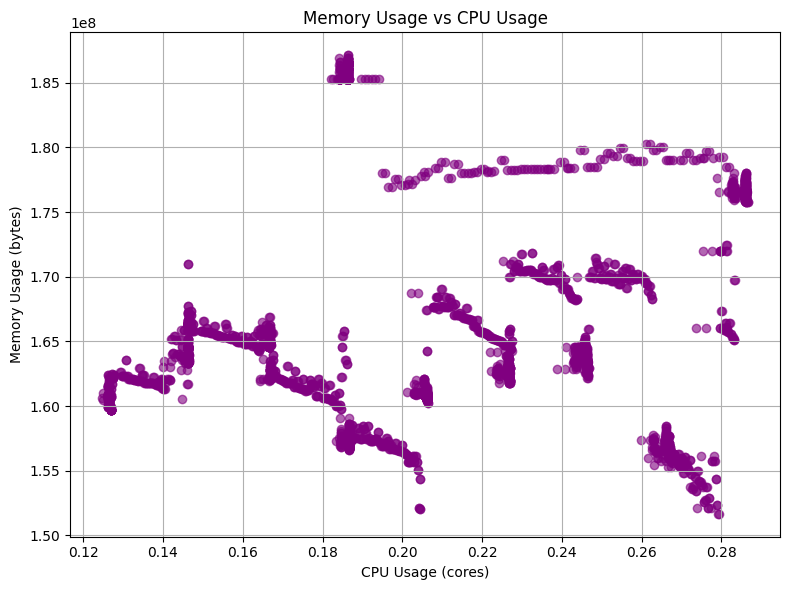

In [9]:
# Plot: Memory Usage vs CPU Usage
plt.figure(figsize=(8, 6))
plt.scatter(df['CPU Usage'], df['Memory Usage'], alpha=0.6, color='purple')
plt.title("Memory Usage vs CPU Usage")
plt.xlabel("CPU Usage (cores)")
plt.ylabel("Memory Usage (bytes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Calculate CPU Usage Percentage
df['CPU_Usage_Percentage'] = (df['CPU Usage'] / df['CPU Limit']) * 100

# Calculate Memory Usage Percentage
df['Memory_Usage_Percentage'] = (df['Memory Usage'] / df['Memory Limit']) * 100

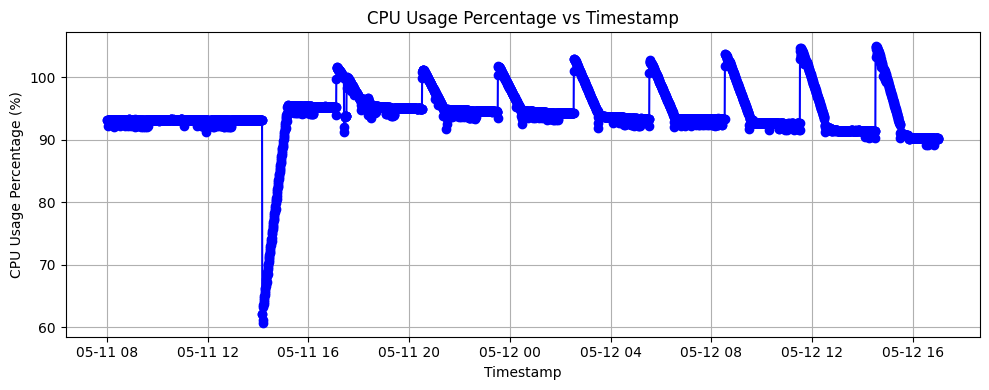

In [11]:
# Plot: CPU Usage Percentage vs Timestamp
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['CPU_Usage_Percentage'], marker='o', color='blue')
plt.title("CPU Usage Percentage vs Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage Percentage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

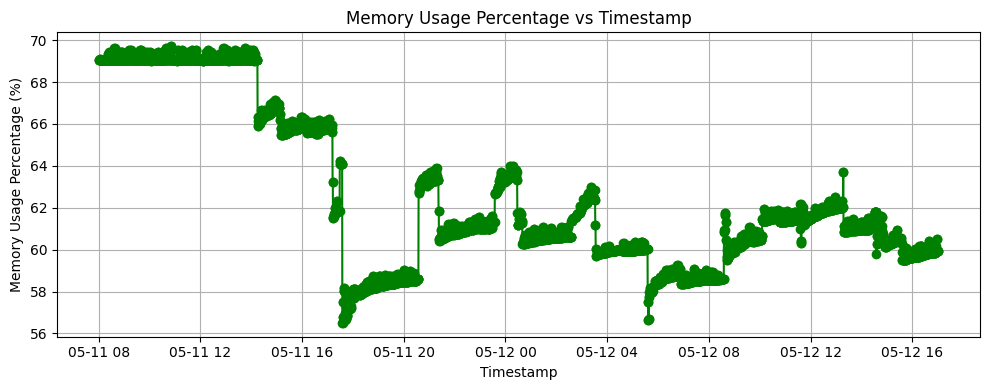

In [12]:
# Plot: Memory Usage Percentage vs Timestamp
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Memory_Usage_Percentage'], marker='o', color='green')
plt.title("Memory Usage Percentage vs Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Memory Usage Percentage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

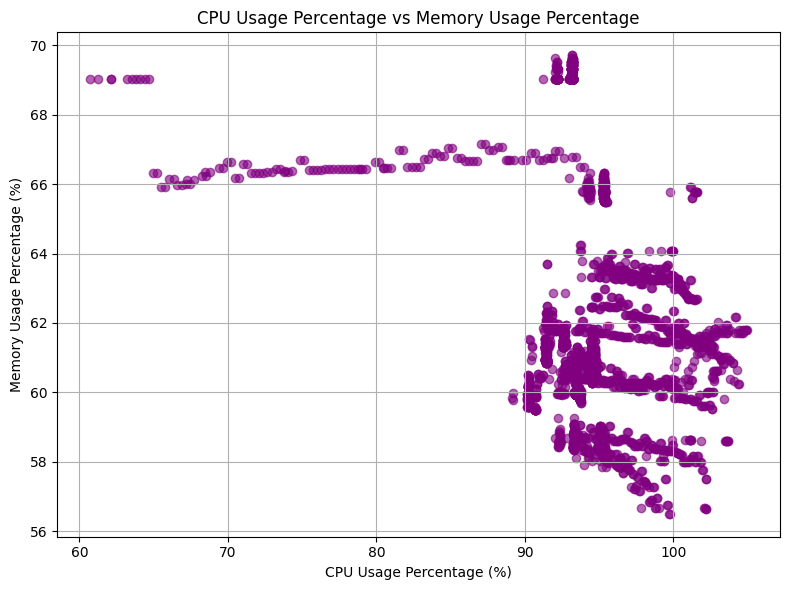

In [13]:
# Plot: CPU Usage Percentage vs Memory Usage Percentage
plt.figure(figsize=(8, 6))
plt.scatter(df['CPU_Usage_Percentage'], df['Memory_Usage_Percentage'], alpha=0.6, color='purple')
plt.title("CPU Usage Percentage vs Memory Usage Percentage")
plt.xlabel("CPU Usage Percentage (%)")
plt.ylabel("Memory Usage Percentage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

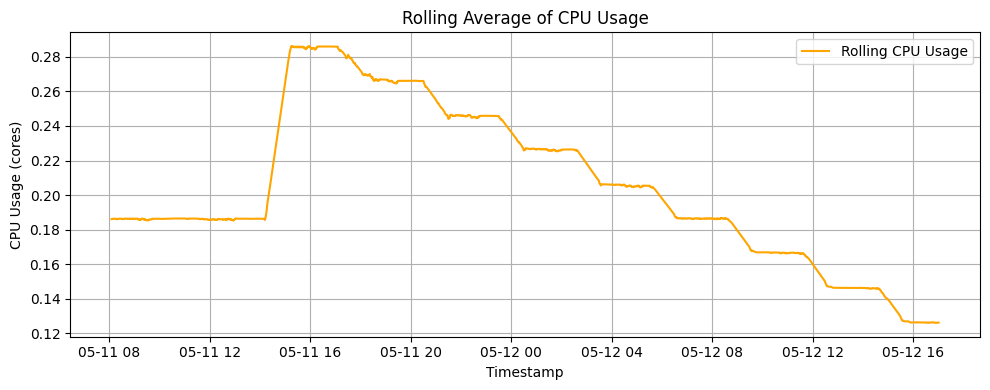

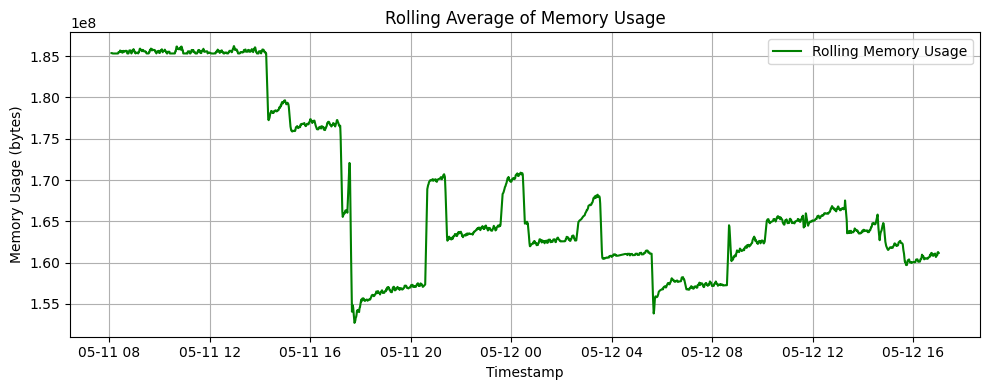

In [14]:
df['Rolling_CPU_Usage'] = df['CPU Usage'].rolling(window=10).mean()
df['Rolling_Memory_Usage'] = df['Memory Usage'].rolling(window=10).mean()

# Plot rolling averages
plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Rolling_CPU_Usage'], color='orange', label='Rolling CPU Usage')
plt.title("Rolling Average of CPU Usage")
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage (cores)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(df['Timestamp'], df['Rolling_Memory_Usage'], color='green', label='Rolling Memory Usage')
plt.title("Rolling Average of Memory Usage")
plt.xlabel("Timestamp")
plt.ylabel("Memory Usage (bytes)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


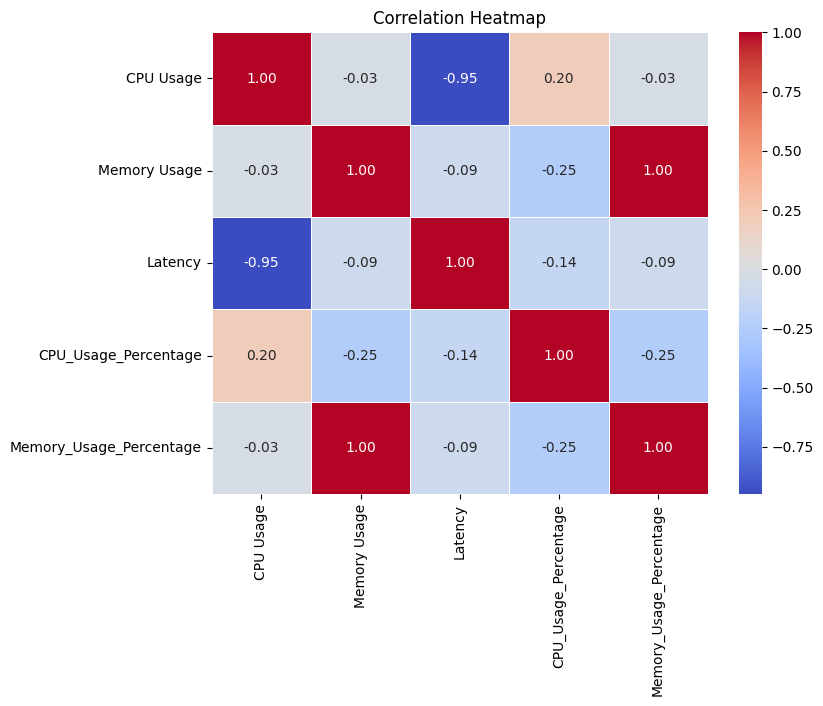

In [15]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[['CPU Usage', 'Memory Usage', 'Latency', 'CPU_Usage_Percentage', 'Memory_Usage_Percentage']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
